# Figure 3 plotting

In [2]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')

data_folder='/nfs/team205/vk8/processed_data/muscle/data_v3/'

import plotnine

In [3]:
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'pdf')

In [4]:
model_folder = '/nfs/team205/vk8/scripts/scvi/Results/scvi_models/'
figures = '/nfs/team205/vk8/scripts/scvi/SKM_analyses_rev1/figures'
tables = '/nfs/team205/vk8/scripts/scvi/SKM_analyses_rev1/tables'
source_files = "/nfs/team205/vk8/scripts/scvi/SKM_ageing_atlas_SourceFiles/"

In [5]:
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'pdf')

###  Plot spliced vs unspliced ratios (Fig.3d and Extended Data Fig. 4b-c)

In [7]:
import scvelo as scv
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

In [8]:
adata_myofiber2myonuclei = sc.read('/nfs/team205/vk8/processed_data/muscle/data_v3/Myofiber2myonuclei_scvi_integration_mod_2023-05-10.h5ad')

In [9]:
adata_all_raw = sc.read("/nfs/team205/vk8/processed_data/muscle/data_v3/ICM_scell2snuclei_data_raw_all_layers_2023-05-09.h5ad")

In [10]:
adata_all_raw_filt = adata_all_raw[~adata_all_raw.obs['annotation_level2'].isnull()]

In [11]:
adata_all_raw_filt.obs['is_myofiber'] = adata_all_raw_filt.obs.apply(lambda x: 'Myofiber' if x['annotation_level0'] in ['MF-I', 'MF-II', 'MF-IIsc(fg)',
       'MF-IIsn(fg)', 'MF-Isc(fg)', 'MF-Isn(fg)','Hyb','Specialised MF'] else 'Non-myofiber', axis = 1)

del adata_all_raw
import gc
gc.collect()

In [12]:
adata_mf2mn_vc = adata_all_raw[adata_myofiber2myonuclei.obs_names, :].copy()

In [13]:
adata_mf2mn_vc.obs['annotation_level0_fig'] = adata_myofiber2myonuclei.obs.reindex(adata_mf2mn_vc.obs_names)['annotation_level0_fig'].copy()

In [14]:
adata_mf2mn_vc.obs['annotation_level2'] = adata_myofiber2myonuclei.obs.reindex(adata_mf2mn_vc.obs_names)['annotation_level2'].copy()

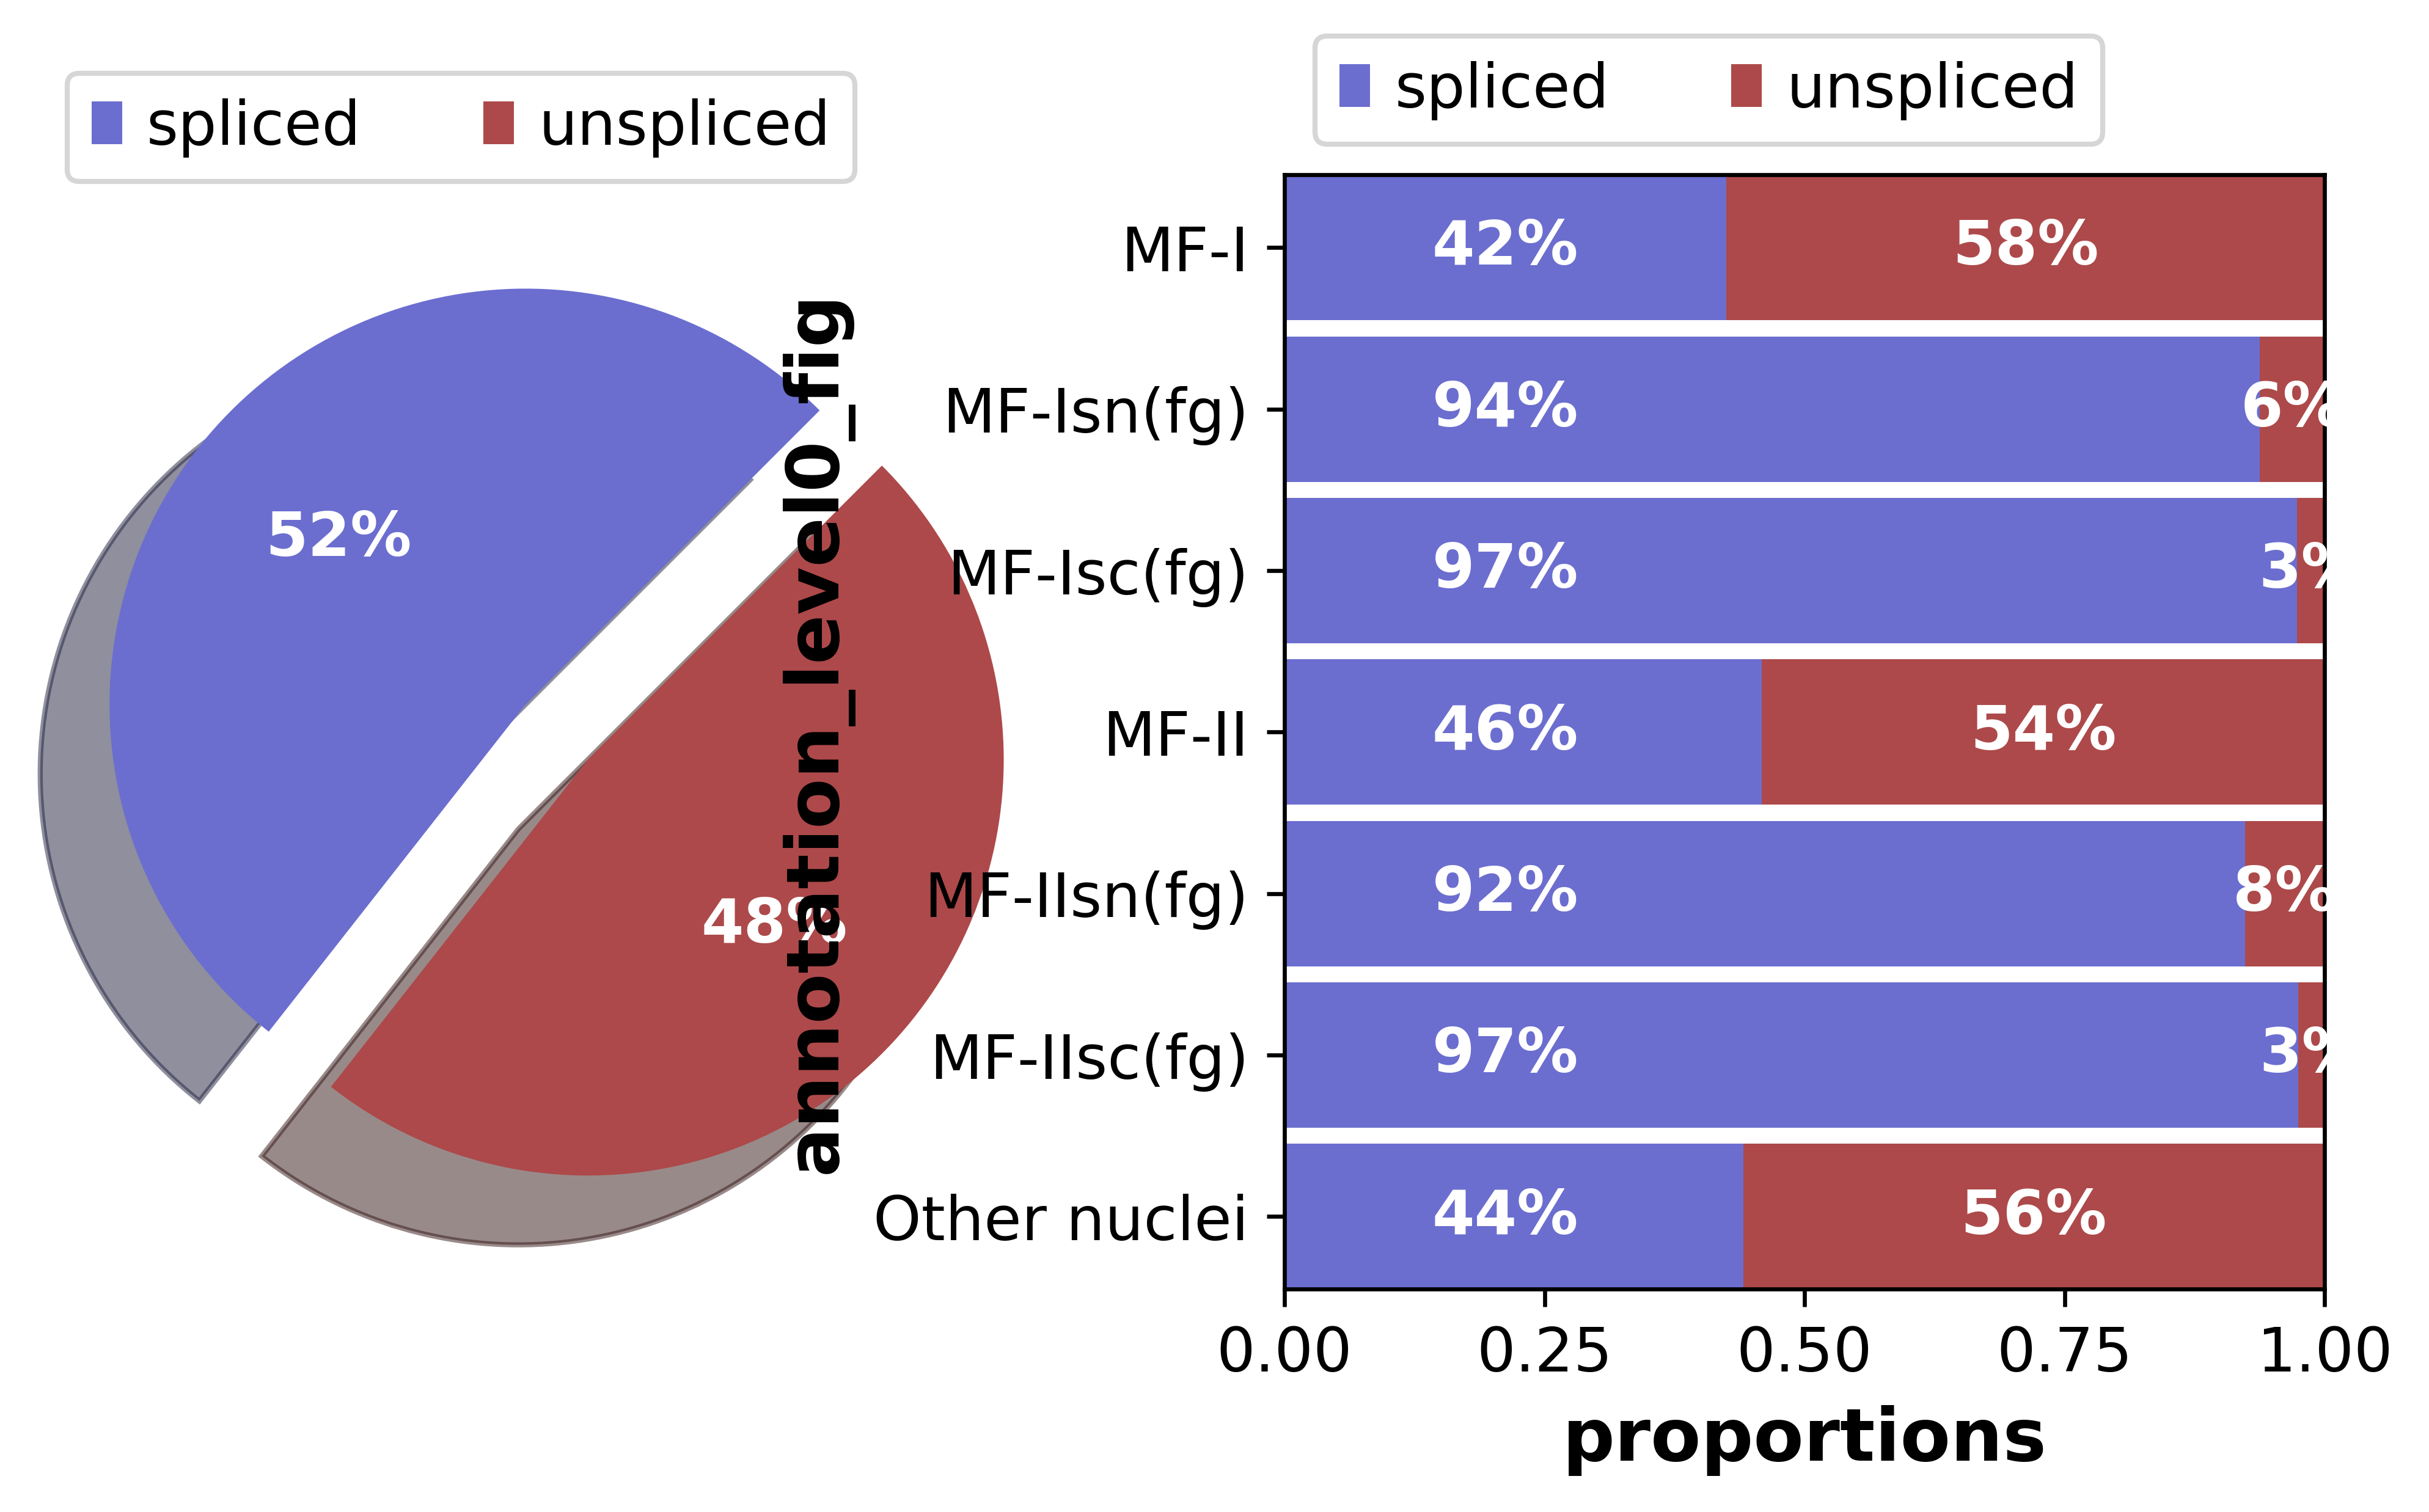

In [16]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_mf2mn_vc, groupby = 'annotation_level0_fig', add_labels_pie=True, fontsize=12, figsize=(8, 4), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show()#save='Myofiber_cells_general_proportions.pdf')

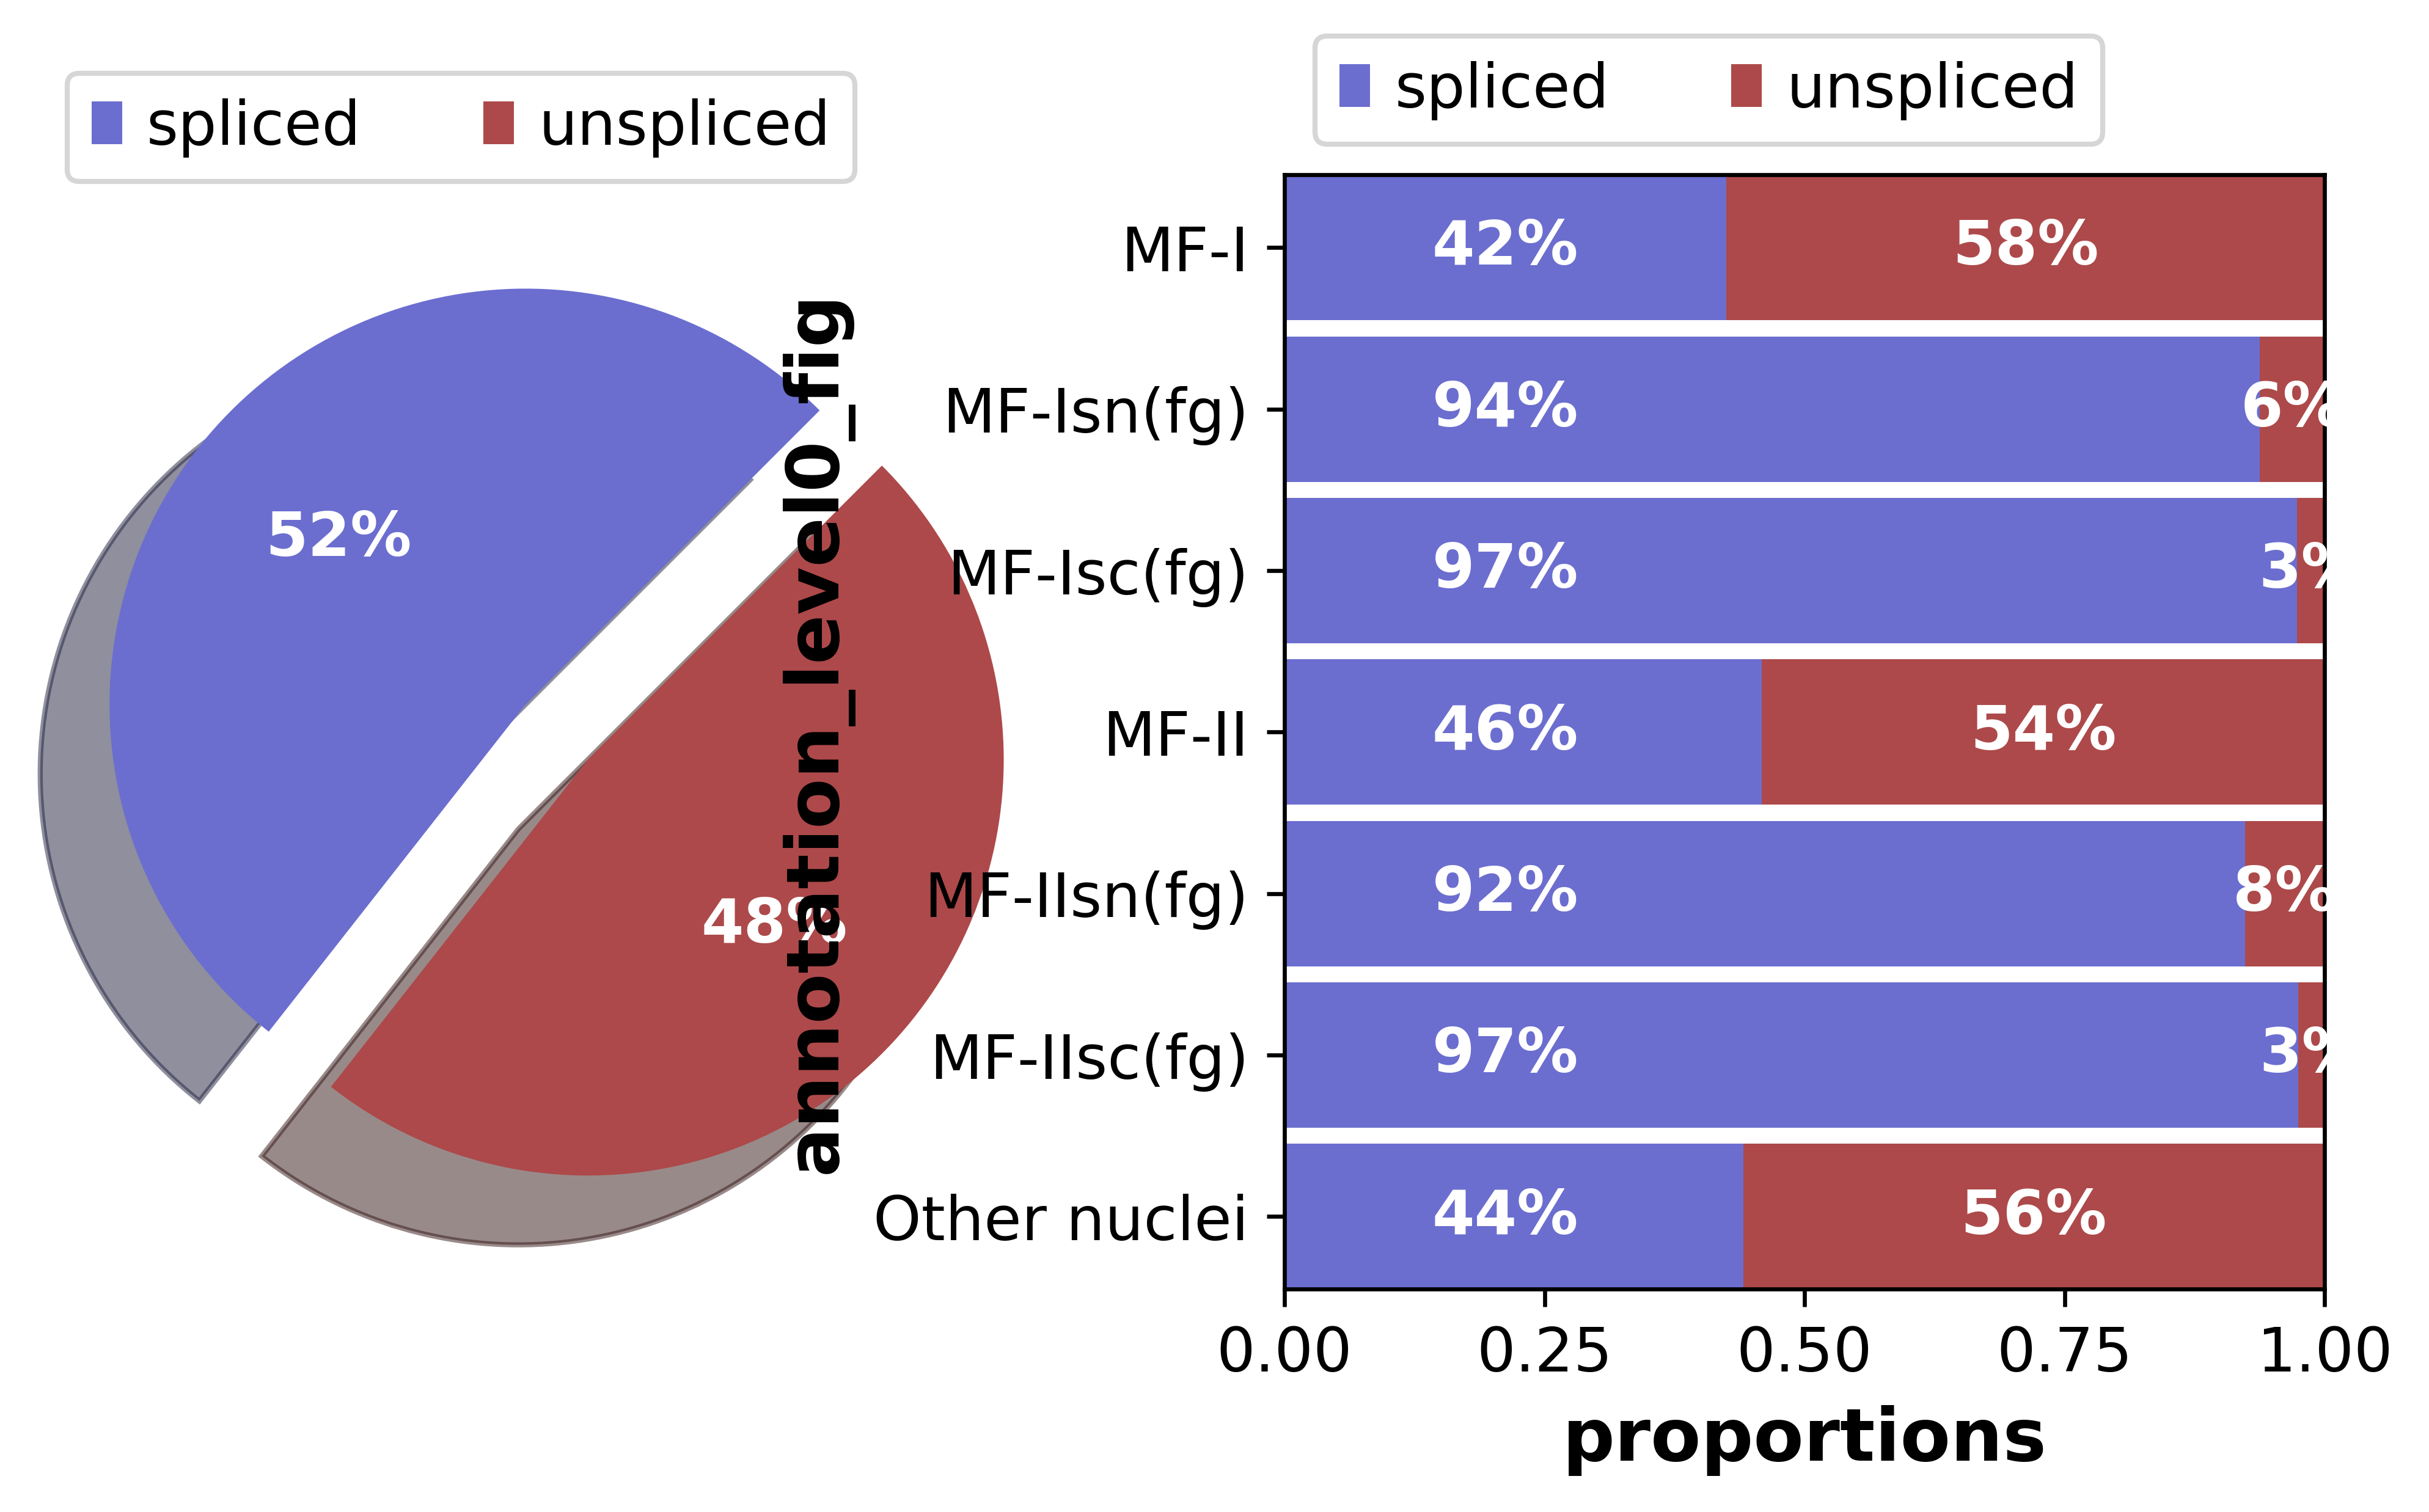

In [77]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_mf2mn_vc, groupby = 'annotation_level0_fig', add_labels_pie=True, fontsize=12, figsize=(8, 4), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show()#save='Myofiber_cells_general_proportions.pdf')

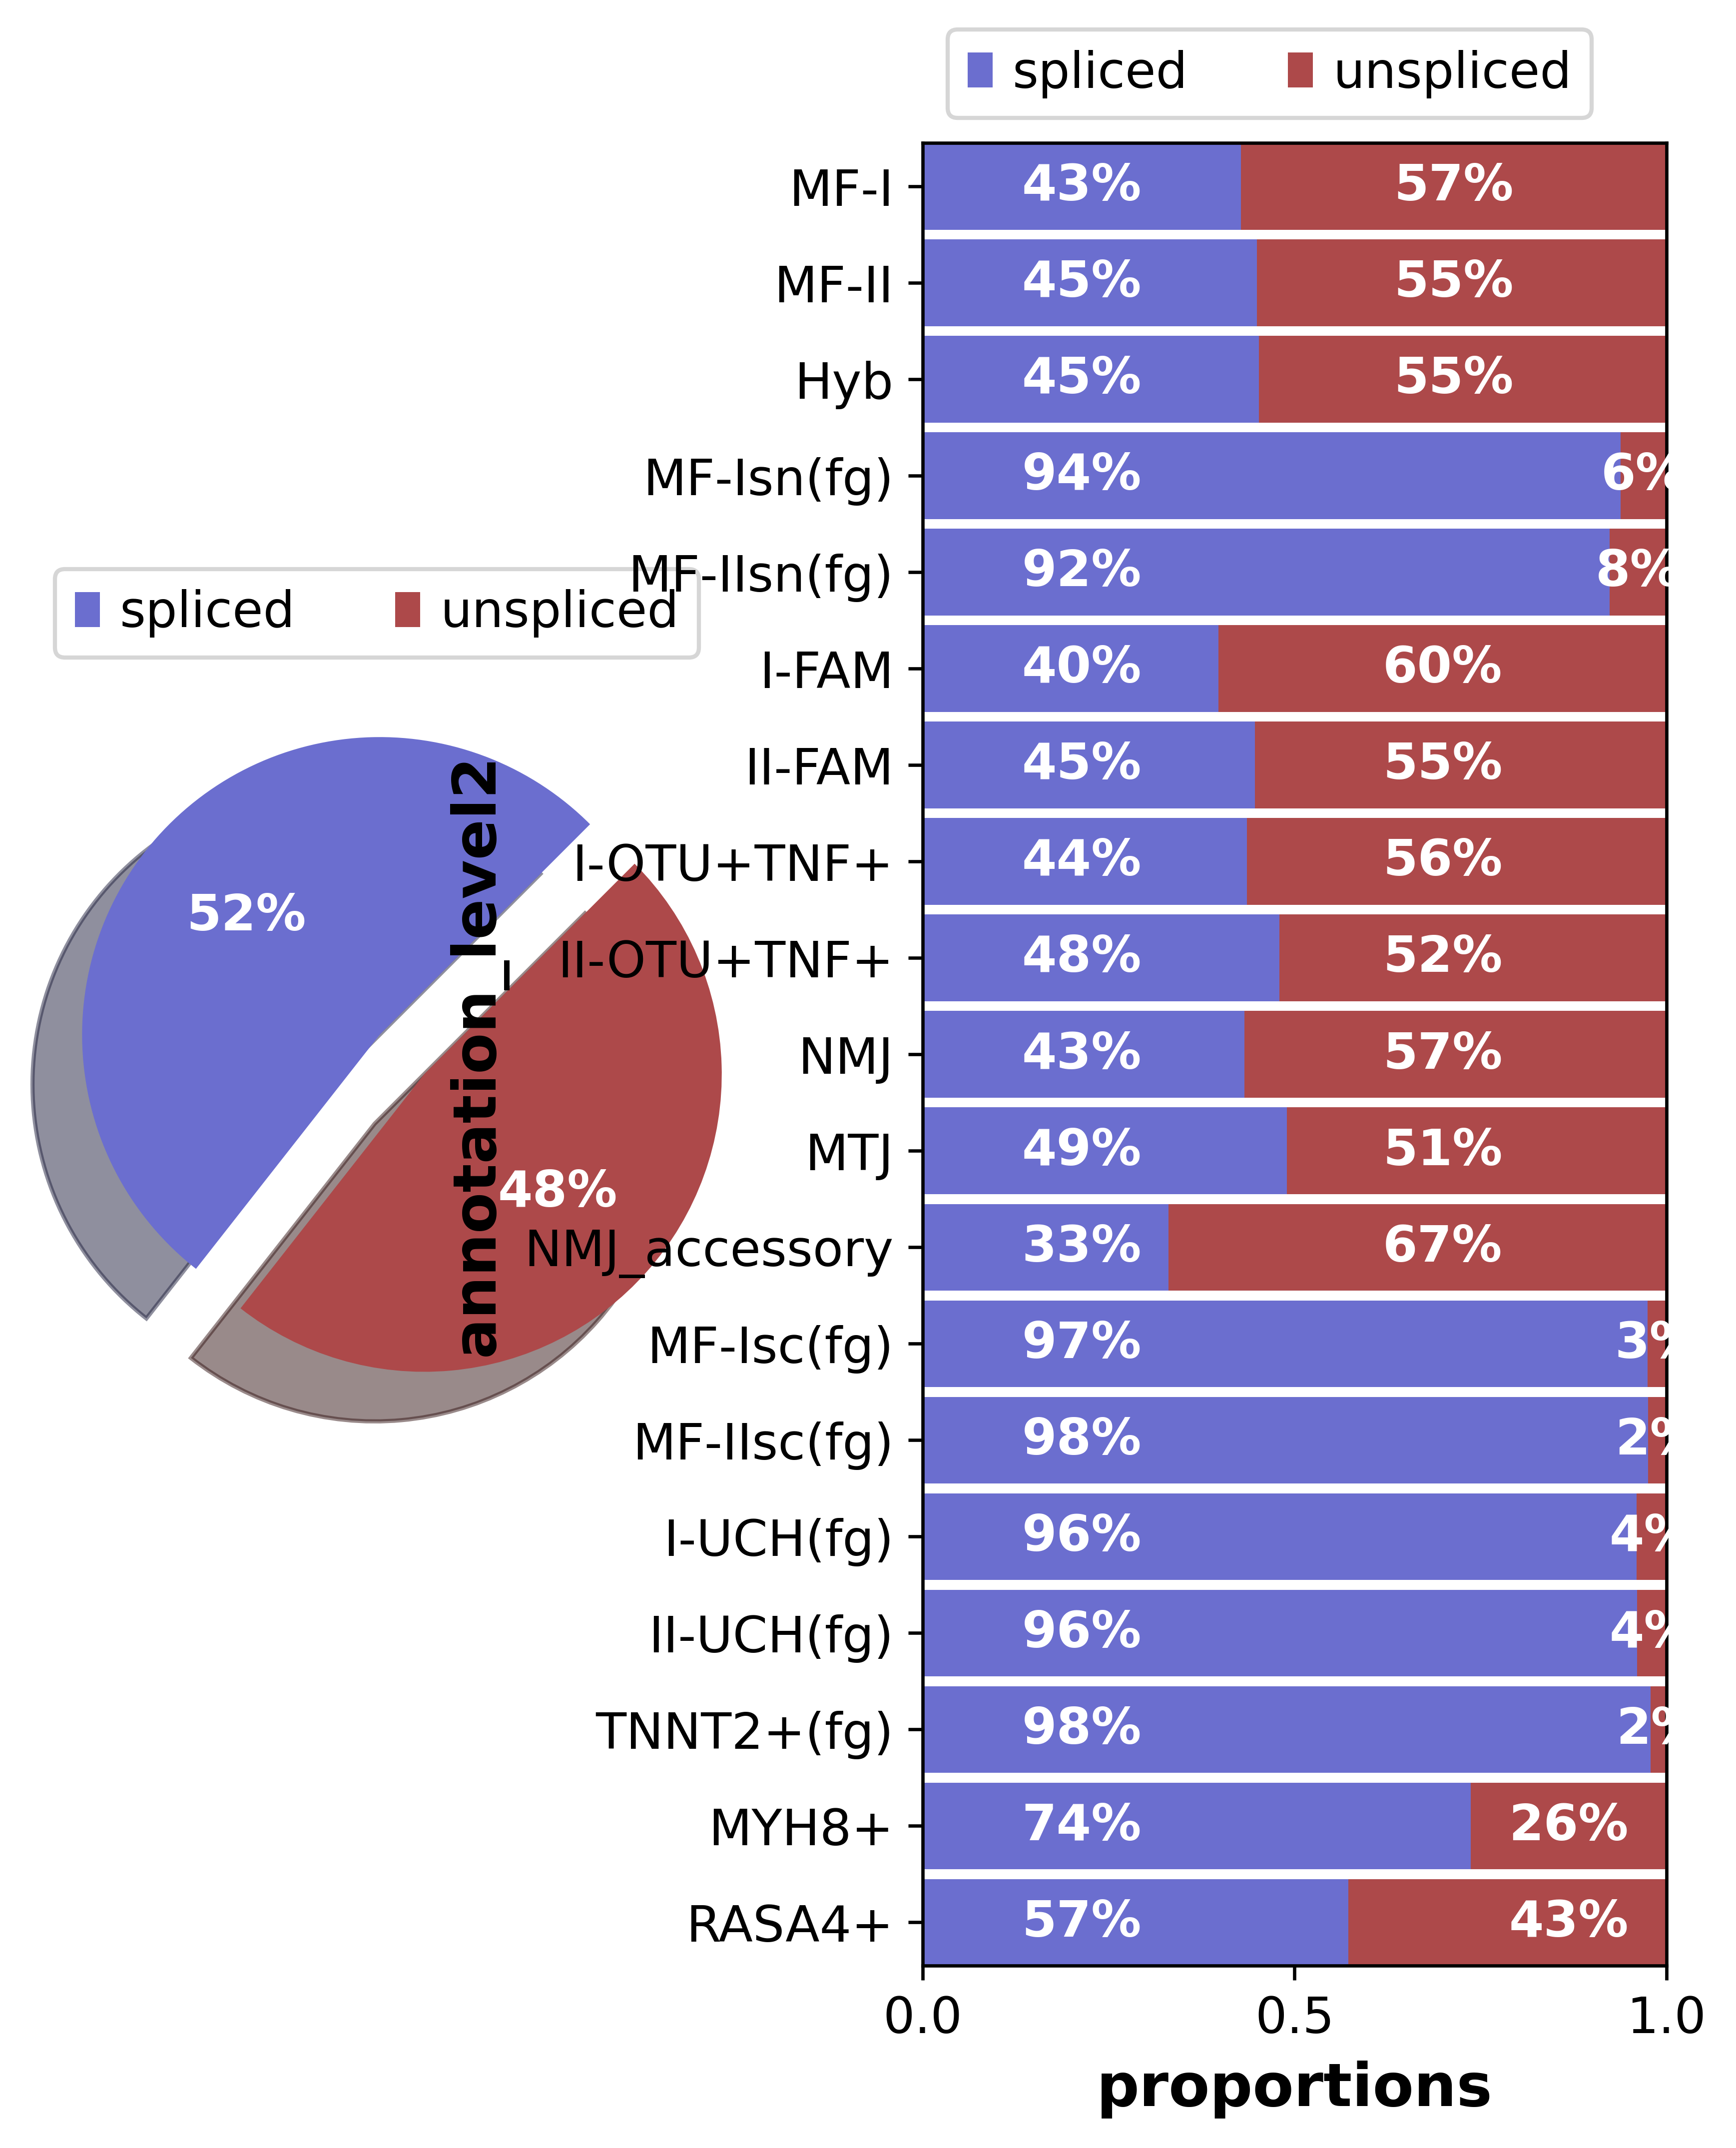

In [83]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_mf2mn_vc, groupby = 'annotation_level2', add_labels_pie=True, fontsize=12, figsize=(7, 8), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show()#save='Myofiber_cells_general_proportions.pdf')

In [23]:
adata_all_raw_filt[(adata_all_raw_filt.obs['is_myofiber'] == 'Myofiber') & 
                                           (adata_all_raw_filt.obs['batch'] == 'nuclei'),:]

View of AnnData object with n_obs × n_vars = 74626 × 33538
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'batch', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'is_myofiber'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts-cells', 'n_cells-cells', 'n_counts-nuclei', 'n_cells-nuclei'
    layers: 'ambiguous', 'raw', 'spliced', 'unspliced'

saving figure to file ./figures/scvelo_Myofiber_nuclei_pie_pct_spliced.pdf


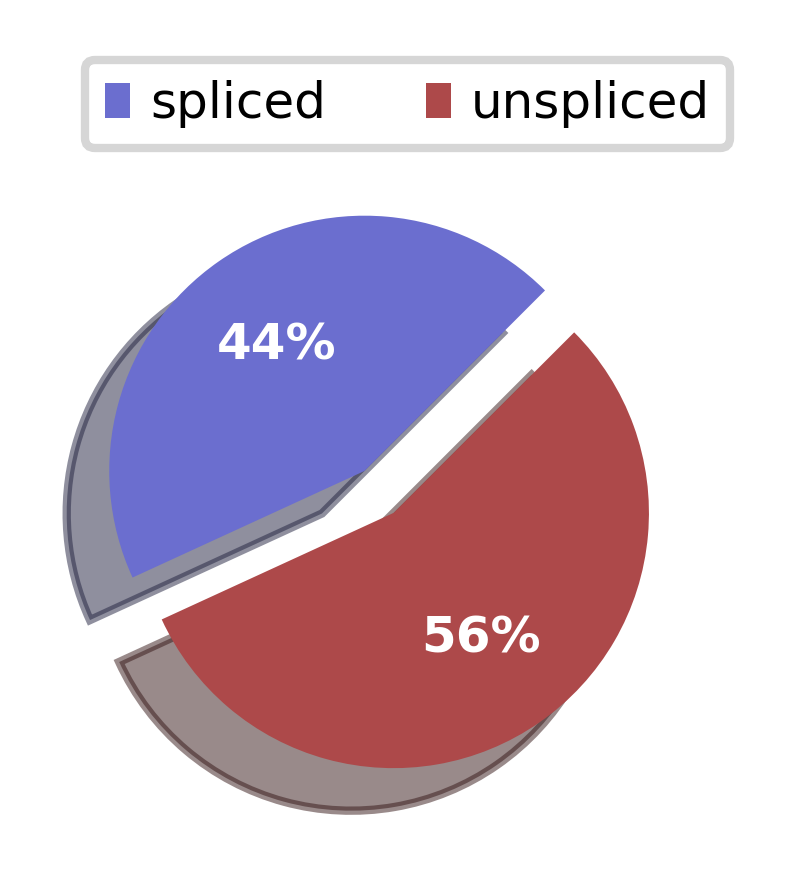

In [28]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_all_raw_filt[(adata_all_raw_filt.obs['is_myofiber'] == 'Myofiber') & 
                                           (adata_all_raw_filt.obs['batch'] == 'nuclei'),:],  fontsize=6, figsize=(3, 3), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show(save='Myofiber_nuclei_pie_pct_spliced.pdf')

saving figure to file ./figures/scvelo_Myofiber_cells_pie_pct_spliced.pdf


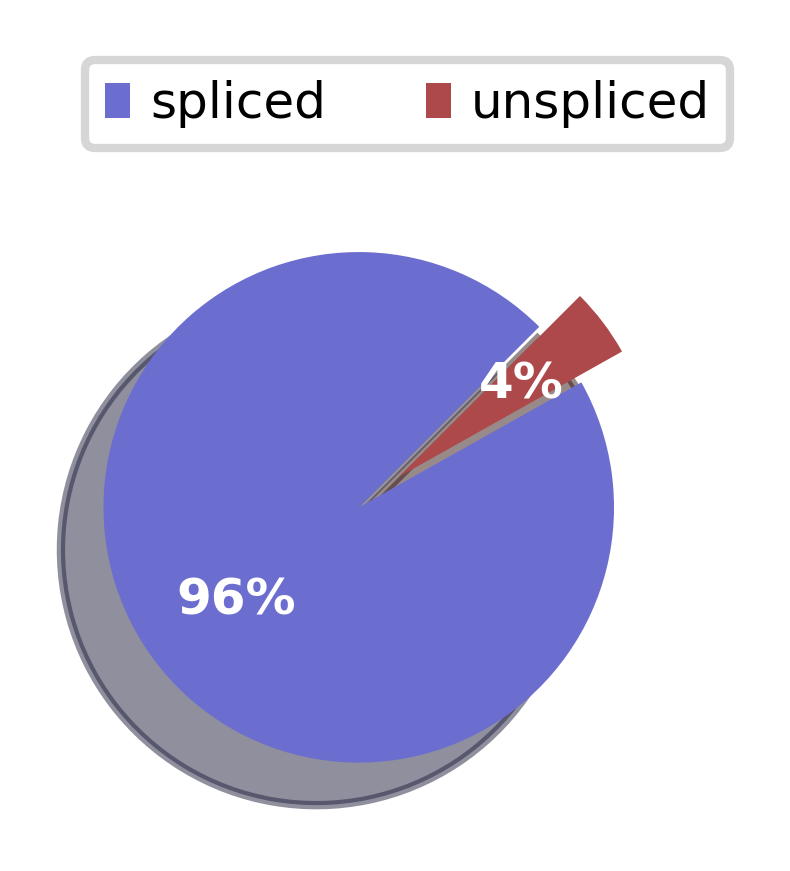

In [30]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_all_raw_filt[(adata_all_raw_filt.obs['is_myofiber'] == 'Myofiber') & 
                                           (adata_all_raw_filt.obs['batch'] == 'cells'),:],  fontsize=6, figsize=(3, 3), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show(save='Myofiber_cells_pie_pct_spliced.pdf')

saving figure to file ./figures/scvelo_Non-Myofiber_nuclei_pie_pct_spliced.pdf


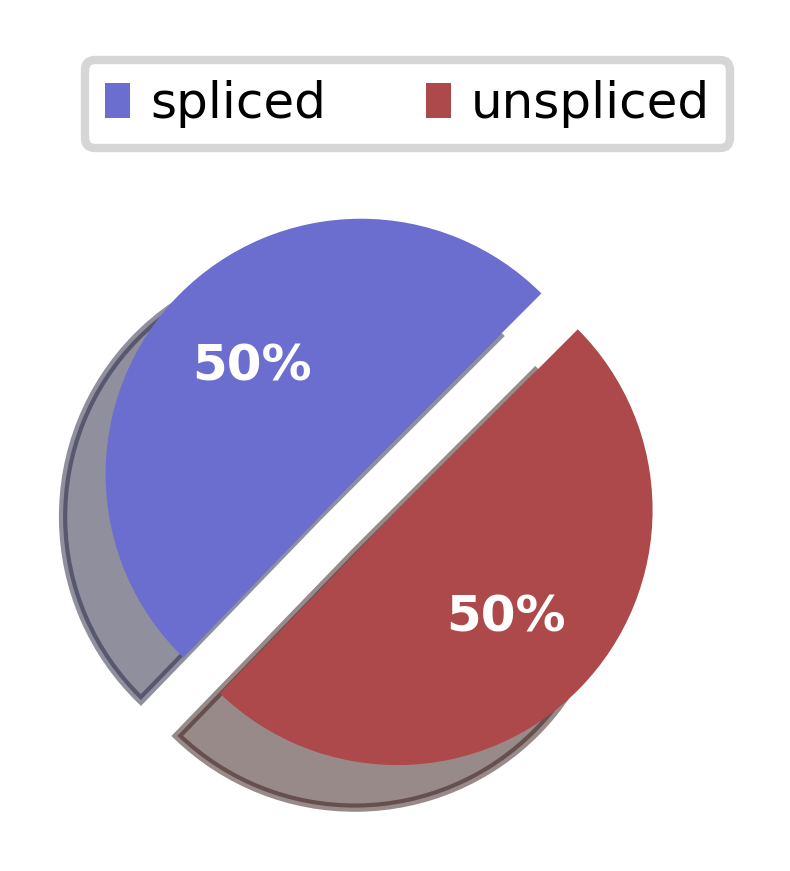

In [31]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_all_raw_filt[(adata_all_raw_filt.obs['is_myofiber'] == 'Non-myofiber') & 
                                           (adata_all_raw_filt.obs['batch'] == 'nuclei'),:],  fontsize=6, figsize=(3, 3), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show(save='Non-Myofiber_nuclei_pie_pct_spliced.pdf')

saving figure to file ./figures/scvelo_Non-Myofiber_cells_pie_pct_spliced.pdf


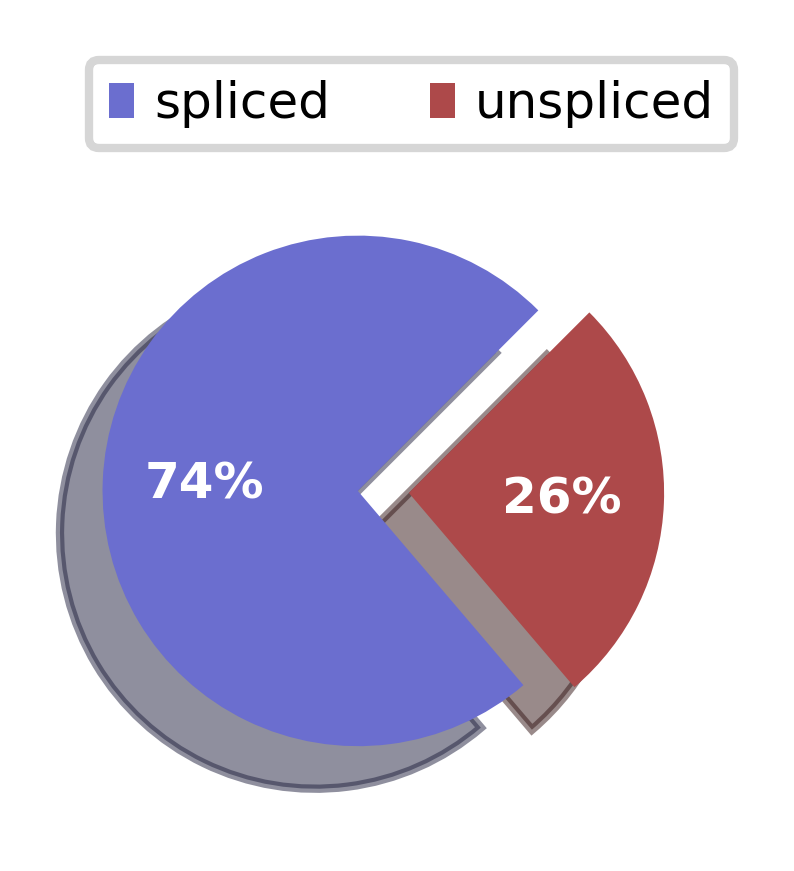

In [32]:
rcParams['pdf.fonttype'] = 42
ax = scv.pl.proportions(adata_all_raw_filt[(adata_all_raw_filt.obs['is_myofiber'] == 'Non-myofiber') & 
                                           (adata_all_raw_filt.obs['batch'] == 'cells'),:],  fontsize=6, figsize=(3, 3), dpi = 300,  show=False);
scv.pl.utils.savefig_or_show(save='Non-Myofiber_cells_pie_pct_spliced.pdf')